# Neural Network for Image Classification with Numpy

In this notebook, I'll be making a Neural network for image classification on the MNIST Dataset. A dataset containing handwritten digits of 60,000 training examples and 10,000 testing examples.

Goals:
- [Loading Data and Initializing Parameters](#loading-the-data)
- [Forward Propagation](#forward-propagation)
- [Backward Propagation](#backward-propagation)
- [Testing the model](#testing-the-model)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import helper as mnist

## Loading The Data

A set of very usual helper functions provided by MNIST is available in helper.py containing the functions needed to load, and view the images in the dataset.

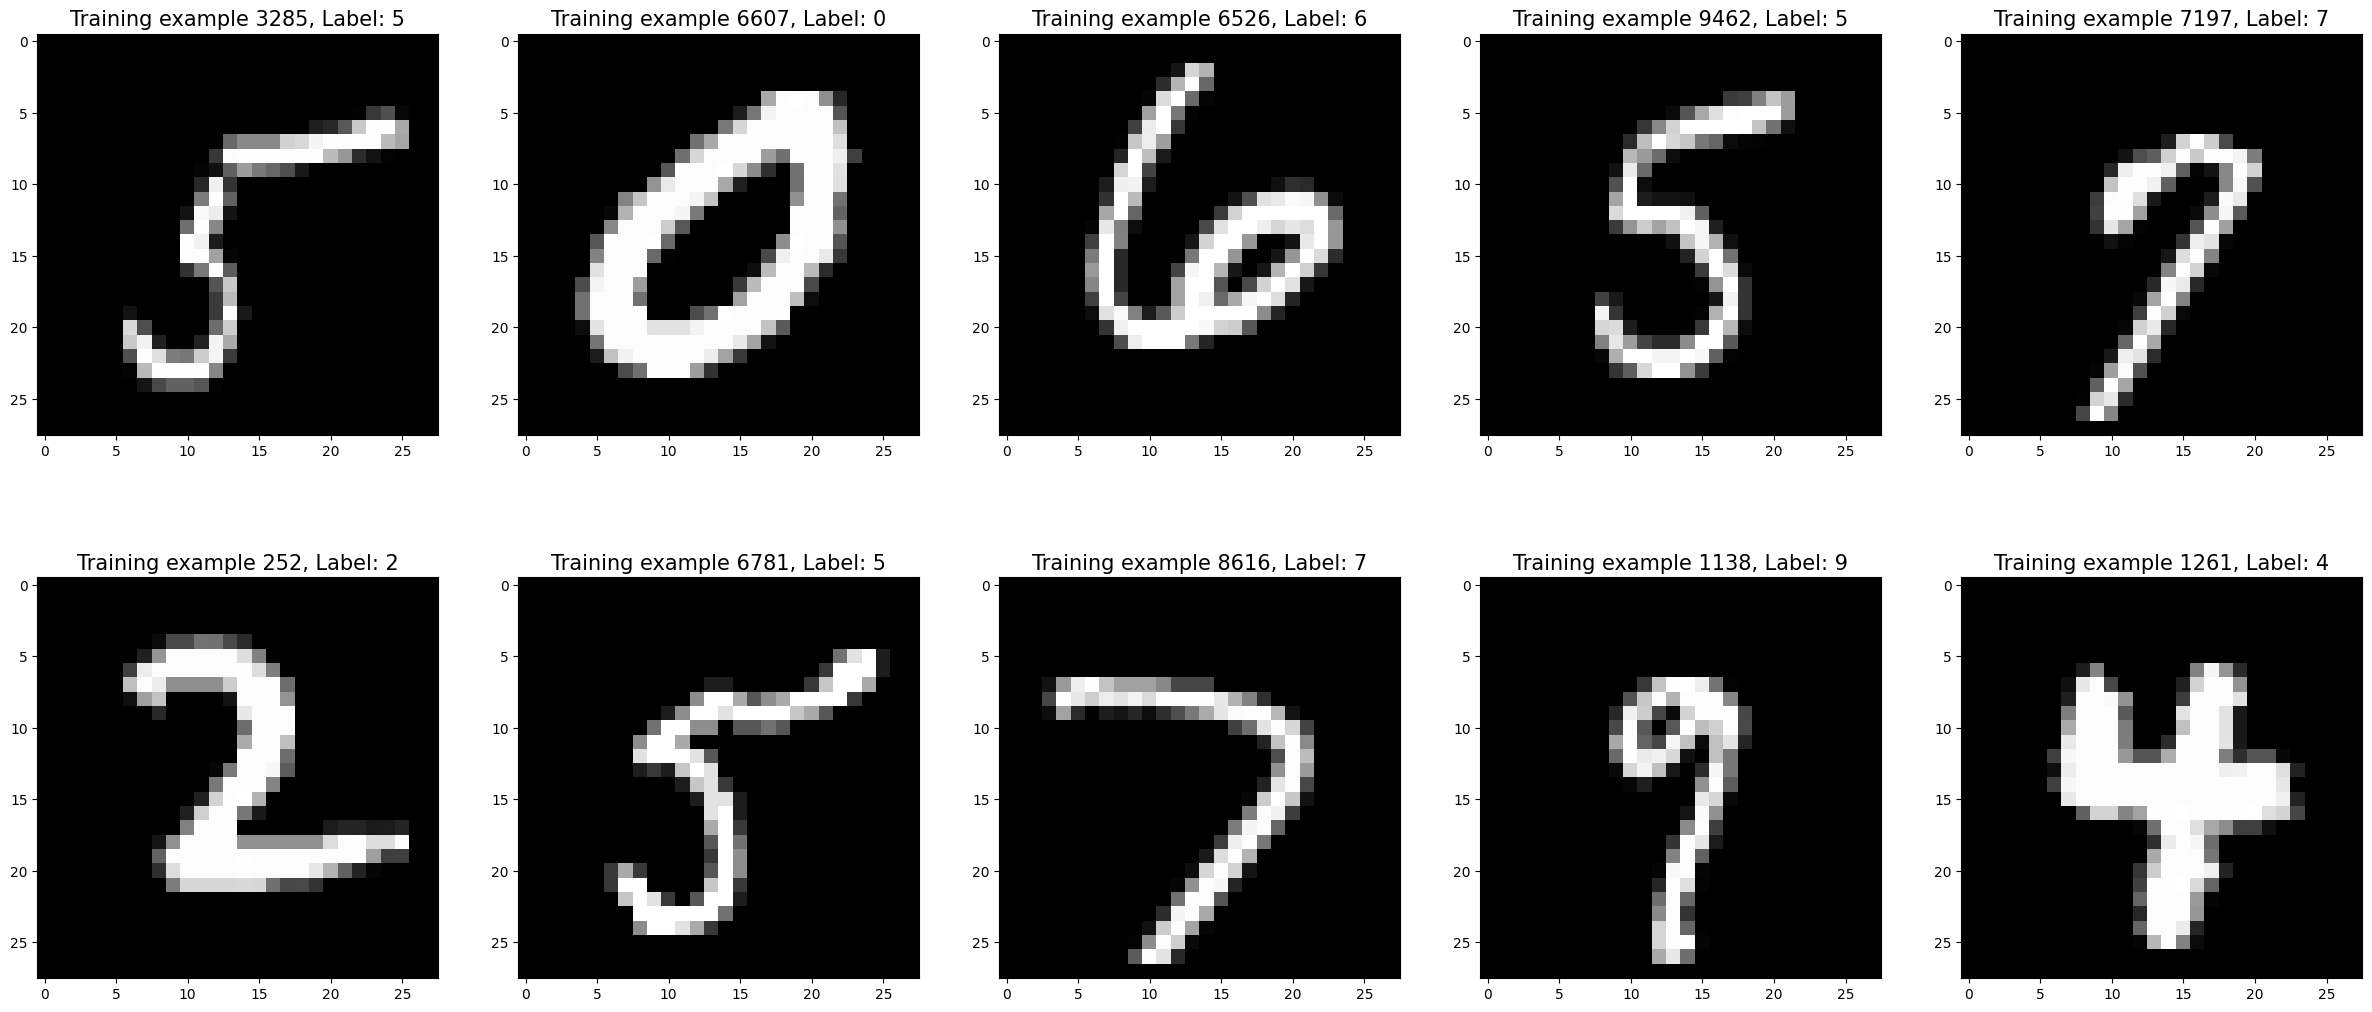

In [2]:
training_images, training_labels = 'train-images.idx3-ubyte', 'train-labels.idx1-ubyte'
testing_images, testing_labels = 't10k-images.idx3-ubyte', 't10k-labels.idx1-ubyte'
data = mnist.MnistDataloader(training_images, training_labels, testing_images, testing_labels) # Load data using helper function
(x_train, y_train), (x_test, y_test) = data.load_data()

## For visualizing the dataset ##
test_list, title_list = [], []
for i in range(1, 11):
    r = np.random.randint(1, 10000)
    test_list.append(x_train[r])
    title_list.append(f'Training example {r}, Label: {str(y_train[r])}')

mnist.show_images(test_list, title_list) # Helper function to view images

## Initializing Parameters

In a deep neural network, the dimensions of parameters for each layer is: (dimension of current layer, dimension of previous layer).
I'll create a function that takes input the dimensions of the neural network, and outputs a list of parameters.

In [3]:
def initialize_parameters_deep(architecture):
    np.seed(42)
    parameters = {}
    for l in len(1, len(architecture)):
        parameters["W" + str(l)] = np.random.rand((architecture[l]["units"], architecture[l]["units"])) * 0.02 # (current layer dimension, previous layer domimension)
        parameters["b" + str(l)] = np.random.rand(architecture[l]["units"])
    return parameters

## Forward Propagation

This network will be 7 layers repeating a "linear --> relu activation" block 3 times, and a final softmax output to otput ${\hat{y}}$ all the while saving the parameters W, b and the previous Activations as cache for back-propagation when training the model.

In [2]:
def linear(A_prev, W, b):
    return np.dot(W, A_prev) + b
def relu(z):
    return np.maximum(0, z)
def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=0, keepdims=True))
    softmax =  exp_z / np.sum(exp_z, axis=0, keepdims=True)
    return softmax
def relu_derivative(z):
    return (z > 0).astype(float)

In [8]:
def forward_propagation(X, parameters, architecture):
    cache = []
    A = X
    for l in range(1, len(architecture)):
        A_prev = A
        W = parameters["W" + str(l)]
        b = parameters["b" + str(l)]
        activation = architecture[l]['activation']

        Z = linear(A_prev, W) + b
        if activation == "linear":
            A = Z
        elif activation == "relu":
            A = relu(Z)
        elif activation == "softmax":
            A = softmax(Z)
        cache.append((A_prev, W, b, Z))
    return A, cache


In [ ]:
def calculate_gradients(architecture, cache, y):
    L = len(architecture)
    gradients = {}
    (A, W, b, Z) = cache
    # Output layer
    gradients["dZ" + str(L)] = A[L] - y
    gradients["dW" + str(L)] = A[L - 1].T @ gradients["dZ" + str(L)]
    gradients["db" + str(L)] = np.sum(gradients["dZ" + str(L)], axis=0, keep_dims=True)

    # Each layer
    for l in reversed(range(1, L)):
        gradients["dA" + str(l)] = gradients["dZ" + str(l + 1)] @ W[l + 1].T
        gradients["dZ" + str(l)] = gradients["dA" + str(l)] * relu_derivative(Z[l])
        gradients["dW" + str(l)] = A[l - 1].T @ gradients["dZ" + str(l)]
        gradients["db" + str(l)] = np.sum(gradients["dZ" + str(l)], axis=0, keep_dims=True)
    return gradients

In [ ]:
def back_propagation(gradients, parameters, architecture, learning_rate=0.01):
    L = len(architecture)
    for l in reversed(range(1, L)):
        parameters["W" + str(l)] -= learning_rate * gradients["dW" + str(l)]
        parameters["b" + str(l)] -= learning_rate * gradients["db" + str(l)]
    return parameters